In [ ]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 18.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.7/113.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 28.8 MB/s eta 0:00:0000:0100:01
  Created wheel for peewee: filename=peewee-3.18.1-cp312-cp312-macosx_10_15_x86_64.whl size=271226 sha256=28b819e3d4f861e5cce887ce0964696ad0f0a051a906c582207a2181dd611e87
  Stored in directory: /Users/aditya/Library/Caches/pip/wheels/1a/57/6a/bb71346381d0d911cd4ce3026f1fa720da76707e4f01cf27dd
Successfully built peewee


In [15]:
!pip install pandas_datareader

In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader as pdr

### Green Energy ETF - iShares Global Clean Energy ETF (ICLN) 

In [ ]:
# Define the ticker symbol
ticker = "ICLN"

# Download the historical data
icln_data = yf.download(ticker, start="2018-01-01", end="2025-01-01", interval="1d")

# Display the first few rows
print(icln_data.head())

# Optional: Save to CSV
icln_data.to_csv("/Users/aditya/Desktop/MSQE PROJECT/Project_Data/ICLN_2018_2024_Daily.csv")

[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open  Volume
Ticker          ICLN      ICLN      ICLN      ICLN    ICLN
Date                                                      
2018-01-02  8.579463  8.579463  8.479702  8.497840  102000
2018-01-03  8.561325  8.588533  8.534118  8.588533   64200
2018-01-04  8.497841  8.570394  8.452495  8.543187  364000
2018-01-05  8.525048  8.561325  8.497841  8.534118  167200
2018-01-08  8.652018  8.652018  8.543187  8.552257  155000


### Brown Energy ETF1  - XLE (Energy Select Sector SPDR ETF)

In [6]:
# Define the ticker symbol
ticker = "xle"

# Download the historical data
xle_data = yf.download(ticker, start="2018-01-01", end="2025-01-01", interval="1d")

# Display the first few rows
print(xle_data.head())

# Optional: Save to CSV
xle_data.to_csv("/Users/aditya/Desktop/MSQE PROJECT/Project_Data/xle_2018_2024_Daily.csv")

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker            XLE        XLE        XLE        XLE       XLE
Date                                                            
2018-01-02  53.147751  53.205639  52.380746  52.547175  14891400
2018-01-03  53.943691  54.081170  53.198388  53.256277  19299600
2018-01-04  54.269306  54.305488  53.712144  53.907511  14306800
2018-01-05  54.247593  54.291007  53.798965  54.196942  14204400
2018-01-08  54.573204  54.602148  54.081162  54.225884   9779200


## Realized Volatility and Option-Implied Volatility (IV) Data

This for ICLN ticker (Green) and XLE (Brown), with both 5 Day and 21 Day annualized volatilities. Using 252 trading days for annualization (standard).

In [14]:
# Set the date range
start_date = '2018-01-01'
end_date = '2024-12-31'

# Define ETF tickers
green_ticker = 'ICLN'   # Green ETF
brown_ticker = 'XLE'    # Brown ETF

# Download data (auto-adjusted prices)
green_data = yf.download(green_ticker, start=start_date, end=end_date, progress=False)
brown_data = yf.download(brown_ticker, start=start_date, end=end_date, progress=False)

# If data is not adjusted automatically, use 'Adj Close'
# Ensure 'Adj Close' is present, fallback to 'Close' if needed
price_col = 'Adj Close' if 'Adj Close' in green_data.columns else 'Close'

# Calculate returns
green_data['Returns'] = green_data[price_col].pct_change()
brown_data['Returns'] = brown_data[price_col].pct_change()

# Calculate annualized rolling volatility
green_data['Vol_5d'] = green_data['Returns'].rolling(window=5).std() * np.sqrt(252)
green_data['Vol_21d'] = green_data['Returns'].rolling(window=21).std() * np.sqrt(252)

brown_data['Vol_5d'] = brown_data['Returns'].rolling(window=5).std() * np.sqrt(252)
brown_data['Vol_21d'] = brown_data['Returns'].rolling(window=21).std() * np.sqrt(252)

# Save to CSV
green_data.to_csv('/Users/aditya/Desktop/MSQE PROJECT/Project_Data/green_etf_volatility.csv')
print(green_data.head())
brown_data.to_csv('/Users/aditya/Desktop/MSQE PROJECT/Project_Data/brown_etf_volatility.csv')
print(brown_data.head())

# Download VIX implied volatility data as proxy
vix_data = yf.download('^VIX', start=start_date, end=end_date, progress=False)
vix_data.to_csv('/Users/aditya/Desktop/MSQE PROJECT/Project_Data/vix_iv_proxy.csv')
print(vix_data.head())

print("Data downloaded and saved successfully.")


Price          Close      High       Low      Open  Volume   Returns Vol_5d  \
Ticker          ICLN      ICLN      ICLN      ICLN    ICLN                    
Date                                                                          
2018-01-02  8.579464  8.579464  8.479703  8.497841  102000       NaN    NaN   
2018-01-03  8.561326  8.588534  8.534119  8.588534   64200 -0.002114    NaN   
2018-01-04  8.497839  8.570392  8.452493  8.543185  364000 -0.007416    NaN   
2018-01-05  8.525048  8.561325  8.497841  8.534118  167200  0.003202    NaN   
2018-01-08  8.652018  8.652018  8.543187  8.552257  155000  0.014894    NaN   

Price      Vol_21d  
Ticker              
Date                
2018-01-02     NaN  
2018-01-03     NaN  
2018-01-04     NaN  
2018-01-05     NaN  
2018-01-08     NaN  
Price           Close       High        Low       Open    Volume   Returns  \
Ticker            XLE        XLE        XLE        XLE       XLE             
Date                                       

## Macroeconomic Controls Data

In [24]:
from fredapi import Fred
fred = Fred(api_key='6c0ecd6565503b64631fd2b36f71293a')

# Set the date range
start_date = "2018-01-01"
end_date = "2025-01-01"

# Market-based controls from Yahoo Finance
tickers = {
    'VIX': '^VIX',  # Volatility Index
    'Brent_Oil': 'BZ=F',  # Brent Crude Oil Futures
    'SP500': '^GSPC',  # S&P 500 Index
    'Natural_Gas': 'NG=F',  # Natural Gas Futures
    'US10Y': '^TNX',  # 10-Year Treasury Yield
}

macro_data = {}
for label, ticker in tickers.items():
    df = yf.download(ticker, start=start_date, end=end_date)[["Close"]]
    df.columns = [label]  # Flatten column name
    macro_data[label] = df

# Combine all into one DataFrame
macro_combined = pd.concat(macro_data.values(), axis=1)

# Drop rows with any missing values
macro_combined.dropna(inplace=True)

# CPI from FRED (monthly inflation data)
cpi = pdr.data.DataReader("CPIAUCNS", "fred", start=start_date, end=end_date)
cpi.rename(columns={"CPIAUCNS": "CPI"}, inplace=True)

# Forward-fill CPI to daily frequency
macro_combined = macro_combined.merge(cpi, how='left', left_index=True, right_index=True)
macro_combined['CPI'] = macro_combined['CPI'].fillna(method='ffill')

# Save
macro_combined.to_csv("/Users/aditya/Desktop/MSQE PROJECT/Project_Data/macro_control_variables.csv")
print(macro_combined.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


             VIX  Brent_Oil        SP500  Natural_Gas  US10Y  CPI
Date                                                             
2018-01-02  9.77  66.570000  2695.810059        3.056  2.465  NaN
2018-01-03  9.15  67.839996  2713.060059        3.008  2.447  NaN
2018-01-04  9.22  68.070000  2723.989990        2.880  2.453  NaN
2018-01-05  9.22  67.620003  2743.149902        2.795  2.476  NaN
2018-01-08  9.52  67.779999  2747.709961        2.835  2.480  NaN


/var/folders/1r/zy587f0538s953xzbmtbxc2h0000gn/T/ipykernel_12265/2401726001.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  macro_combined['CPI'] = macro_combined['CPI'].fillna(method='ffill')


In [29]:
import requests, time, csv, datetime
from bs4 import BeautifulSoup

# ------------- settings -------------
TICKERS = ['NEE', 'ENPH', 'DUK', 'XOM', 'CVX']          # add more tickers here
OUTFILE = 'morningstar_esg_scores.csv'
USER_AGENT = (
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 '
    '(KHTML, like Gecko) Chrome/122.0 Safari/537.36'
)
SLEEP_SECONDS = 2                                       # polite delay between requests
# -------------------------------------

HEADERS = {'User-Agent': USER_AGENT}
BASE_URL = 'https://www.morningstar.com/stocks/{exchange}/{ticker}/quote'

def find_exchange(ticker):
    """
    Morningstar puts US tickers under xnas/xnys, ADRs under xtse/xlse, etc.
    A cheap way to guess exchange is to try NASDAQ (xnas) first, then NYSE (xnys).
    If both fail you can inspect the redirect URL manually.
    """
    for exch in ('xnas', 'xnys'):
        url = BASE_URL.format(exchange=exch, ticker=ticker.lower())
        r = requests.get(url, headers=HEADERS, allow_redirects=False)
        if r.status_code == 200:
            return exch
        if r.status_code == 301 and '/quote' in r.headers.get('Location', ''):
            # redirected to an existing page → use that exchange
            return exch
    return None

def scrape_esg_score(ticker):
    exch = find_exchange(ticker)
    if exch is None:
        print(f'  Could not resolve exchange for {ticker}')
        return None, None
    url = BASE_URL.format(exchange=exch, ticker=ticker.lower())
    r = requests.get(url, headers=HEADERS, timeout=15)
    if r.status_code != 200:
        print(f'  HTTP {r.status_code} for {ticker}')
        return None, None

    soup = BeautifulSoup(r.text, 'lxml')

    # Sustainalytics score appears in a span containing the risk label,
    # followed by an <span> with the numeric score.
    # Example fragment:
    # <span data-test="esg-risk-category">Low</span>
    # <span data-test="esg-risk-score">17.7</span>
    label_tag = soup.find('span', attrs={'data-test': 'esg-risk-category'})
    score_tag = soup.find('span', attrs={'data-test': 'esg-risk-score'})
    if not label_tag or not score_tag:
        print(f' ESG score not found for {ticker}')
        return None, None

    label = label_tag.text.strip()
    score = score_tag.text.strip()
    return score, label

def main():
    rows = []
    for tk in TICKERS:
        print(f'⏳  Scraping {tk} ...')
        score, label = scrape_esg_score(tk)
        rows.append(
            {
                'Ticker': tk,
                'ESG_Risk_Score': score if score else 'NA',
                'ESG_Risk_Label': label if label else 'NA',
                'Scrape_Date': datetime.date.today().isoformat(),
            }
        )
        time.sleep(SLEEP_SECONDS)

    # write to CSV
    with open(OUTFILE, 'w', newline='') as f:
        fieldnames = ['Ticker', 'ESG_Risk_Score', 'ESG_Risk_Label', 'Scrape_Date']
        writer = csv.DictWriter(f, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(rows)

    print(f'\n✅  Saved {len(rows)} rows to {OUTFILE}')

if __name__ == '__main__':
    main()


⏳  Scraping NEE ...
 ESG score not found for NEE
⏳  Scraping ENPH ...
 ESG score not found for ENPH
⏳  Scraping DUK ...
  HTTP 202 for DUK
⏳  Scraping XOM ...
  Could not resolve exchange for XOM
⏳  Scraping CVX ...
  Could not resolve exchange for CVX

✅  Saved 5 rows to morningstar_esg_scores.csv


In [3]:
# Define the list of events
events = [
    {
        "Date": "2018-01-01",
        "Event Title": "Revision of EU ETS Directive",
        "Description": "The EU revised the Emissions Trading System (ETS) Directive for Phase 4, aligning it with the 2030 climate and energy framework.",
        "Source": "https://climate.ec.europa.eu/eu-action/eu-emissions-trading-system-eu-ets/about-eu-ets_en"
    },
    {
        "Date": "2019-12-12",
        "Event Title": "European Green Deal Presented",
        "Description": "The European Commission unveiled the European Green Deal, aiming for climate neutrality by 2050.",
        "Source": "https://en.wikipedia.org/wiki/European_Green_Deal"
    },
    {
        "Date": "2020-03-04",
        "Event Title": "Proposal for European Climate Law",
        "Description": "A proposal was made to legally bind the EU to achieve climate neutrality by 2050.",
        "Source": "https://www.consilium.europa.eu/en/policies/paris-agreement-climate/timeline-paris-agreement"
    },
    {
        "Date": "2021-07-14",
        "Event Title": "'Fit for 55' Package Presented",
        "Description": "The European Commission introduced a comprehensive package to reduce net greenhouse gas emissions by at least 55% by 2030.",
        "Source": "https://climate.ec.europa.eu/eu-action/eu-emissions-trading-system-eu-ets/about-eu-ets_en"
    },
    {
        "Date": "2023-06-01",
        "Event Title": "Approval of 'Fit for 55' Proposals",
        "Description": "The European Parliament and the Council of the EU approved all ETS-related proposals under the 'Fit for 55' package.",
        "Source": "https://climate.ec.europa.eu/eu-action/eu-emissions-trading-system-eu-ets/about-eu-ets_en"
    },
    {
        "Date": "2024-01-01",
        "Event Title": "Expansion of EU ETS",
        "Description": "The EU ETS expanded to include CO₂ emissions from maritime transport, and the emissions cap was adjusted downward.",
        "Source": "https://icapcarbonaction.com/en/ets/eu-emissions-trading-system-eu-ets"
    },
    {
        "Date": "2025-01-01",
        "Event Title": "Maritime Operators Surrender Allowances",
        "Description": "Maritime operators are required to surrender allowances under the EU ETS for the first time.",
        "Source": "https://icapcarbonaction.com/en/ets/eu-emissions-trading-system-eu-ets"
    },
    {
        "Date": "2025-04-04",
        "Event Title": "EU ETS Emissions Reduction Report",
        "Description": "The European Commission reported a 50% reduction in emissions covered by the EU ETS since 2005.",
        "Source": "https://climate.ec.europa.eu/news-your-voice/news/eu-emissions-trading-system-has-reduced-emissions-sectors-covered-50-2005-2025-04-04_en"
    }
]

# Create the DataFrame
df = pd.DataFrame(events)

# Save to CSV
df.to_csv("/Users/aditya/Desktop/MSQE PROJECT/Project_Data/EU_Carbon_Policy_Events_2018_2025.csv", index=False)

print("CSV file 'EU_Carbon_Policy_Events_2018_2025.csv' created successfully.")


CSV file 'EU_Carbon_Policy_Events_2018_2025.csv' created successfully.


In [5]:
from statsmodels.tsa.ar_model import AutoReg

# -----------------------------
# Step 1: Load EUA Carbon Price Data
# -----------------------------
eua_data = pd.read_csv("/Users/aditya/Desktop/MSQE PROJECT/Project_Data/Carbon Emissions Futures Historical Data (Daily).csv")
eua_data['Date'] = pd.to_datetime(eua_data['Date'])
eua_data.sort_values('Date', inplace=True)

# Rename price column and set datetime index
eua_data.rename(columns={eua_data.columns[1]: 'Price'}, inplace=True)
eua_data.set_index('Date', inplace=True)

# Compute daily returns
eua_data['Returns'] = eua_data['Price'].pct_change()
eua_data.dropna(inplace=True)

# -----------------------------
# Step 2: Model-Based Shock Identification (AR(5) Residuals)
# -----------------------------
model = AutoReg(eua_data['Returns'], lags=5, old_names=False).fit()
eua_data['Residuals'] = model.resid

# Use a threshold of 1.0 standard deviation
threshold = 1.0 * eua_data['Residuals'].std()
eua_data['Shock_ModelBased'] = (np.abs(eua_data['Residuals']) > threshold).astype(int)

# -----------------------------
# Step 3: Event-Based Shock Tagging (Nearest Date Match)
# -----------------------------
events_df = pd.read_csv("/Users/aditya/Desktop/MSQE PROJECT/Project_Data/EU_Carbon_Policy_Events_2018_2025.csv")
events_df['Date'] = pd.to_datetime(events_df['Date'])

# Initialize the event-based shock indicator
eua_data['Shock_EventBased'] = 0

# For each event date, tag the nearest trading date as a shock
for event_date in events_df['Date']:
    nearest_idx = eua_data.index.get_indexer([event_date], method='nearest')[0]
    nearest_date = eua_data.index[nearest_idx]
    eua_data.at[nearest_date, 'Shock_EventBased'] = 1

# -----------------------------
# Step 4: Save Final Annotated Dataset
# -----------------------------
eua_data.to_csv("/Users/aditya/Desktop/MSQE PROJECT/Project_Data/EEUA_Shock_Annotated_Final.csv")

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


📈 Summary: Carbon Price Shock Detection (2018–2025)
✅ Model-Based Shocks (454 days)
These were identified using an AR(5) model on daily carbon price returns.

A shock was flagged if the residual exceeded 1.0 standard deviation.

This method detected 454 shock days, indicating frequent short-term volatility in the EU carbon market.

These shocks will be useful for estimating impulse responses and analyzing how markets absorb statistical surprises.

📅 Event-Based Shocks (7 days)
These shocks were identified by aligning known EU carbon policy announcements with the nearest trading day.

These represent exogenous, policy-driven shocks, making them ideal for causal inference.

Dates include major milestones like cap adjustments and reforms under the EU Fit-for-55 climate package.

🎯 Overlap (1 day: 2024-01-02)
This date was flagged by both methods — it was:

A policy event date, and

A statistically significant price spike.

This makes it a prime candidate for deep-dive analysis, as it likely triggered a strong market reaction rooted in both policy and pricing.

🔍 Interpretation
The large number of model-based shocks suggests that EUA prices experience many short bursts of volatility—possibly from energy markets, auctions, or investor behavior.

Event-based shocks, while fewer, offer stronger causal identification and can anchor your regressions or treatment effects analysis.

The single overlapping shock (2024-01-02) is especially valuable for validating how well markets respond to anticipated policy signals.

In [6]:
# Load price data
icln = pd.read_csv("/Users/aditya/Desktop/MSQE PROJECT/Project_Data/ICLN_2018_2024_Daily.csv", parse_dates=["Date"])
xle = pd.read_csv("/Users/aditya/Desktop/MSQE PROJECT/Project_Data/XLE_2018_2024_Daily.csv", parse_dates=["Date"])

# Step 1: Calculate daily returns using 'Close' prices
icln['ICLN_Returns'] = icln['Close'].pct_change()
xle['XLE_Returns'] = xle['Close'].pct_change()

# Step 2: Retain only Date and returns columns, drop missing values
icln_clean = icln[['Date', 'ICLN_Returns']].dropna()
xle_clean = xle[['Date', 'XLE_Returns']].dropna()

# Step 3: Merge on Date
etf_returns = pd.merge(icln_clean, xle_clean, on='Date', how='inner')
etf_returns.set_index('Date', inplace=True)

# Step 4: Save the result for IRF use
etf_returns.to_csv("/Users/aditya/Desktop/MSQE PROJECT/Project_Data/green_brown_etf_returns.csv")

print("✅ ETF return data saved as 'green_brown_etf_returns.csv'")


/var/folders/1r/zy587f0538s953xzbmtbxc2h0000gn/T/ipykernel_32737/3723467590.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  icln = pd.read_csv("/Users/aditya/Desktop/MSQE PROJECT/Project_Data/ICLN_2018_2024_Daily.csv", parse_dates=["Date"])
/var/folders/1r/zy587f0538s953xzbmtbxc2h0000gn/T/ipykernel_32737/3723467590.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  xle = pd.read_csv("/Users/aditya/Desktop/MSQE PROJECT/Project_Data/XLE_2018_2024_Daily.csv", parse_dates=["Date"])


✅ ETF return data saved as 'green_brown_etf_returns.csv'


In [18]:
import statsmodels.api as sm

# Load shock and ETF return data
shock_df = pd.read_csv("/Users/aditya/Desktop/MSQE PROJECT/Project_Data/EEUA_Shock_Annotated_Final.csv", parse_dates=["Date"])
etf_df = pd.read_csv("/Users/aditya/Desktop/MSQE PROJECT/Project_Data/green_brown_etf_returns.csv", parse_dates=["Date"])

In [ ]:
# Merge both datasets on Date
data = pd.merge(etf_df, shock_df[['Date', 'Shock_ModelBased']], on='Date', how='inner')
data.set_index('Date', inplace=True)

# Function to run Local Projections
def run_local_projection(data, response_col, shock_col, horizons=[1, 3, 5, 10, 20]):
    irf_results = []
    for h in horizons:
        y = data[response_col].shift(-h) - data[response_col]  # future return minus current (cumulative return)
        X = sm.add_constant(data[shock_col])
        X, y = X.loc[y.dropna().index], y.dropna()
        model = sm.OLS(y, X).fit()

        irf_results.append({
            'Horizon': h,
            'Response': response_col,
            'Shock': shock_col,
            'Beta': model.params[shock_col],
            'SE': model.bse[shock_col],
            'P-value': model.pvalues[shock_col]
        })
    return pd.DataFrame(irf_results)

# Run IRFs for green (ICLN) and brown (XLE) ETFs
green_irf = run_local_projection(data, 'ICLN_Returns', 'Shock_ModelBased')
brown_irf = run_local_projection(data, 'XLE_Returns', 'Shock_ModelBased')

# Add ETF tags and combine results
green_irf['ETF'] = 'ICLN'
brown_irf['ETF'] = 'XLE'
combined_irf = pd.concat([green_irf, brown_irf])

# Save IRF results
combined_irf.to_csv("/Users/aditya/Desktop/MSQE PROJECT/Project_Data/IRF_results_model_based.csv", index=False)

print("IRF estimation completed. Results saved to 'IRF_results_model_based.csv'")

✅ IRF estimation completed. Results saved to 'IRF_results_model_based.csv'


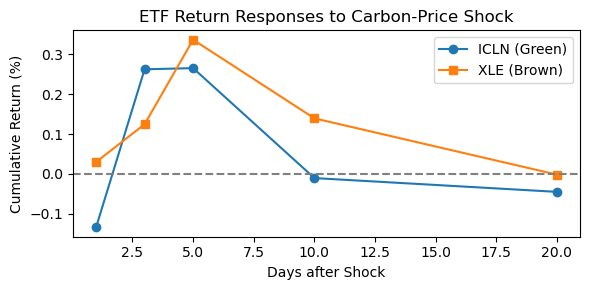

In [1]:
import matplotlib.pyplot as plt

horizons = [1, 3, 5, 10, 20]
icln_beta = [-0.1336, 0.2619, 0.2649, -0.0103, -0.0448]
xle_beta  = [0.0299, 0.1244, 0.3360, 0.1392, -0.0017]

plt.figure(figsize=(6,3))
plt.plot(horizons, icln_beta, marker='o', label='ICLN (Green)')
plt.plot(horizons, xle_beta,  marker='s', label='XLE (Brown)')
plt.axhline(0, color='grey', linestyle='--')
plt.title('ETF Return Responses to Carbon-Price Shock')
plt.xlabel('Days after Shock')
plt.ylabel('Cumulative Return (%)')
plt.legend()
plt.tight_layout()
plt.show()

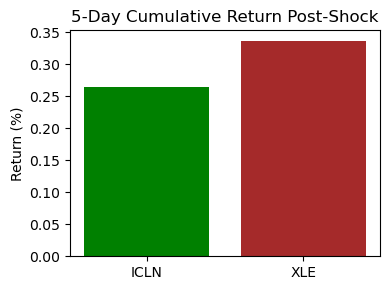

In [2]:
plt.figure(figsize=(4,3))
plt.bar(['ICLN','XLE'], [0.2649, 0.3360], color=['green','brown'])
plt.title('5-Day Cumulative Return Post-Shock')
plt.ylabel('Return (%)')
plt.tight_layout()
plt.show()

In [1]:
!pip install econml

python(84234) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.8 MB/s eta 0:00:00:00:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.1/389.1 kB 6.9 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.3/147.3 kB 3.7 MB/s eta 0:00:00ta 0:00:01
  Created wheel for econml: filename=econml-0.15.1-cp312-cp312-macosx_10_15_x86_64.whl size=1989122 sha256=314786a263de494723998842412ec913f17e8800983d2576b0633d8fdb14fcf0
  Stored in directory: /Users/aditya/Library/Caches/pip/wheels/6b/4a/da/3491484956c0a47300d297d43ffafe4f0ac9baa62fd00a11f3
  Created wheel for shap: filename=shap-0.43.0-cp312-cp312-macosx_10_15_x86_64.whl 

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from econml.grf import CausalForest

# Load your cleaned dataset
combined = pd.read_csv("/Users/aditya/Desktop/MSQE PROJECT/Project_Data/Firm-Level_ESG_and_Abnormal_Return_Data.csv")
combined.dropna(subset=['ESG Rating', 'Abnormal_Return'], inplace=True)

# Define features, treatment, and outcome
X = combined[['ESG Rating']]  # You can add more features here
T = (combined['ETF'] == 'ICLN').astype(int)  # 1 = Green (ICLN), 0 = Brown (XLE)
Y = combined['Abnormal_Return'].values

# Split into train and test
X_train, X_test, T_train, T_test, Y_train, Y_test = train_test_split(X, T, Y, test_size=0.2, random_state=42)

# Fit the causal forest
cf = CausalForest(n_estimators=100, max_depth=5, min_samples_leaf=5)
cf.fit(Y_train, T_train, X=X_train)

# Predict treatment effects
treatment_effects = cf.predict(X_test)

# Combine results
output_df = X_test.copy()
output_df['Estimated_Treatment_Effect'] = treatment_effects

# Save or display results
output_df.to_csv("causal_forest_results.csv", index=False)
print(output_df.head())


TypeError: CausalForest.fit() got multiple values for argument 'X'